<a href="https://colab.research.google.com/github/xiutingc/GASP-python/blob/master/intro_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction to Datasets**
### *Michaela Buchanan - Mark III Systems*

---

###Introduction

Finding a good dataset to train a ML/DL model off of often condidered one of the hardest aspects of starting such a project. In this notebook, I will be showing you 3 different methods of importing and interacting with a dataset once you find one you want to try. First we will be using Keras, then TensorFlow, and finally we will use one we just found on the web. Finally, we will briefly go through a few Pandas functions which are useful for quickly cleaning up a dataset for use in training.

---

###Keras

Keras comes with several commonly used datasets which can easily be imported if you are building your model in Keras. A list of datasets available in Keras can be found [here](https://keras.io/api/datasets/). If you are just looking for a dataset to start learning how to build models, I would highly recommend going this route as these datasets are well known and documented and are also going to be clean and easy to work with. 

We need to start by importing Keras using the following commands. Notice that Keras is now part of TensorFlow so we import it from TF.

In [ ]:
from tensorflow import keras
from keras.datasets import imdb

For this example we are going to import the IMDB movie review dataset. This dataset is commonly used for sentiment classification which means you are trying to train the model to classify the reviews as positive or negative. The code below shows how to import our dataset from Keras.

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

17473536/17464789 [==============================] - 0s 0us/step


This loads the dataset into X and Y training and testing groups. Let's take a look at what our X and Y values look like.

In [ ]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


This dataset is already preprocessed which is why we get a sequence of numbers for our X instead of a written review. The numbers show the frequency of the word they represent, ie 14 is the 14th most frequent word. To find information about your dataset like this visit the Keras documentation on it. For this dataset the documentation is located [here](https://keras.io/api/datasets/imdb/). Let's use the function built into Keras to decode our x sample back to words.

In [ ]:
# https://stackoverflow.com/questions/42821330/restore-original-text-from-keras-s-imdb-dataset

INDEX_FROM = 3

word_to_id = imdb.get_word_index()

word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

inverted_word_index = dict((i, word) for (word, i) in word_to_id.items())
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])
print(decoded_sequence)

1654784/1641221 [==============================] - 0s 0us/step
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big pr

This is an example of the challenges of data science. If you go directly to the documentation and try the steps they describe, you end up with jibberish. I had to look online to find a solution which ended up being in this stack overflow link I put on top of the code. This goes to show that even with the more straightforward dataset solutions you shouldn't be surprised if there are some obstacles to overcome in working with it.

---

###Tensorflow

While the datasets provided by Keras are a great resource for getting started, they are limited in actual problem-solving value. Tensorflow provides a more extensive selection of dataset that you can import in a similar manner to importing datasets from Keras. See this [link](https://www.tensorflow.org/datasets/catalog/overview#all_datasets) to view all the datasets provided by Tensorflow. We will be importing the `oxford_iiit_pet` image dataset which includes 37 different pet categories. I followed the TensorFlow documentation located [here](https://www.tensorflow.org/datasets/overview) for this section.




In [ ]:
import tensorflow_datasets as tfds

ds = tfds.load('oxford_iiit_pet', split='train', shuffle_files=True)

Now let's grab one example from our dataset to inspect. 

['file_name', 'image', 'label', 'segmentation_mask', 'species']
tf.Tensor(b'Sphynx_158.jpg', shape=(), dtype=string)


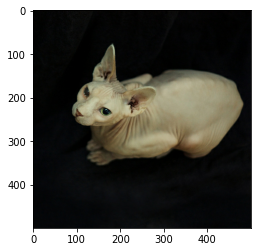

In [ ]:
import matplotlib.pyplot as plt

ds = ds.take(1)

for example in ds:
  print(list(example.keys()))
  image = example["image"]
  label = example["file_name"]
  print(label)
  plt.imshow(image)

---

###Kaggle

For this section I'm not going to do a live demo but instead leave you with the link to the documentation describing how to set it up [here](https://www.kaggle.com/docs/api). The API is pretty simple to set up and use in your command prompt and allows you to easily download any Kaggle dataset to your computer. Kaggle is a great resource for dataset as you get a much greater variety of choices. However, be warned that all of them are uploaded by users like you so a significant amount of cleaning and preprocessing may be required. If you have problems with the Kaggle API feel free to reach out to me and I can help or make a seperate video showing how to do it.

---

###From Source

The final and most traditional method of finding a dataset is just doing a Google search. Many datasets are hosted by the organization that created them and is available via direct download. As an example we are going to be looking at the [Street View House Numbers (SVHN)](http://ufldl.stanford.edu/housenumbers//) dataset which is a different, more challenging take on the classic MNIST dataset. It contains Google Street View images of house numbers and the goal is to be able to find and read the house numbers in the images. 

If you visit the website linked for this dataset, you will see a Downloads section. Let's go ahead and download the test dataset for this example as it should be a bit smaller than the training subset. 

In [ ]:
!wget http://ufldl.stanford.edu/housenumbers/test.tar.gz

--2022-03-02 19:55:26--  http://ufldl.stanford.edu/housenumbers/test.tar.gz
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276555967 (264M) [application/x-gzip]
Saving to: ‘test.tar.gz’

test.tar.gz         100%[===================>] 263.74M  16.8MB/s    in 16s     

2022-03-02 19:55:43 (16.1 MB/s) - ‘test.tar.gz’ saved [276555967/276555967]



The next step is to unpack the images since this download comes compressed as a `.tar.gz` file.

In [ ]:
!tar xvzf test.tar.gz 

Streaming output truncated to the last 5000 lines.
test/2574.png
test/2554.png
test/2550.png
test/2549.png
test/2535.png
test/2528.png
test/2519.png
test/2516.png
test/2510.png
test/2504.png
test/2494.png
test/2491.png
test/2485.png
test/2477.png
test/2470.png
test/2432.png
test/2390.png
test/2385.png
test/2351.png
test/2339.png
test/2320.png
test/2316.png
test/2315.png
test/2296.png
test/2279.png
test/2271.png
test/2258.png
test/2249.png
test/2245.png
test/2229.png
test/2209.png
test/2197.png
test/2192.png
test/2190.png
test/2186.png
test/2178.png
test/2175.png
test/2157.png
test/2154.png
test/2150.png
test/2148.png
test/2128.png
test/2126.png
test/2116.png
test/2103.png
test/2077.png
test/2061.png
test/2047.png
test/2015.png
test/1945.png
test/1939.png
test/1903.png
test/1869.png
test/1859.png
test/1847.png
test/1836.png
test/1826.png
test/1817.png
test/1804.png
test/1796.png
test/1791.png
test/1783.png
test/1773.png
test/1764.png
test/1744.png
test/1718.png
test/1680.png
test/1678.p

Now we can look at the side bar and find our new test directory in the 

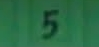

In [ ]:
from IPython.display import Image
Image('test/1.png')

In [ ]:
!pip install mat73
import mat73

data_dict = mat73.loadmat('test/digitStruct.mat')

Above we are pulling the MatLab formatted information about our images from the digitStruct.mat file and printed them out. We can find the 'label' entries which correspond to the image we pull up in this numpy array. This will take a few minutes.

In [ ]:
print(data_dict)

{'digitStruct': {'bbox': [{'height': array(30.), 'label': array(5.), 'left': array(43.), 'top': array(7.), 'width': array(19.)}, {'height': [array(23.), array(23.), array(23.)], 'label': [array(2.), array(1.), array(10.)], 'left': [array(99.), array(114.), array(121.)], 'top': [array(5.), array(8.), array(6.)], 'width': [array(14.), array(8.), array(12.)]}, {'height': array(16.), 'label': array(6.), 'left': array(61.), 'top': array(6.), 'width': array(11.)}, {'height': array(17.), 'label': array(1.), 'left': array(32.), 'top': array(6.), 'width': array(14.)}, {'height': array(28.), 'label': array(9.), 'left': array(97.), 'top': array(28.), 'width': array(19.)}, {'height': array(23.), 'label': array(1.), 'left': array(40.), 'top': array(11.), 'width': array(7.)}, {'height': [array(21.), array(21.), array(21.)], 'label': [array(1.), array(8.), array(3.)], 'left': [array(44.), array(51.), array(62.)], 'top': [array(7.), array(6.), array(6.)], 'width': [array(9.), array(11.), array(10.)]},

---

###Case Study

Now we are going to take a look at a practical example of manipulating datasets for use in ML/DL training. For this case study, we will be looking at both a water quality and a weather dataset. We will be picking out the data we want from each of the datasets and combining them into one using the data collection dates to combine these data points into one new coherant dataset. You could imagine how predicting water quality could be very important for general health, environmental studies, and companies that work in water processing.

This part of the workshop is essentially going to boil down to a crash course in Pandas which is a popular Python library for data analysis and manipulation. While I am going to be showing you some of the things you can do with Pandas, I would highly suggest you refer to the Pandas docs and tutorials (https://pandas.pydata.org/) before taking on your own project like this.

This dataset is for the City of Austin and can be found here: https://data.austintexas.gov/Environment/Water-Quality-Sampling-Data/5tye-7ray 
I went ahead and shortened the dataset considerable as it was quite large. Since this is just a demonstration we don't need the whole dataset and we won't have to wait a long time for Google Colab to download the dataset file. The weather dataset comes from NOAA and was retrieved using their climate data tool found in this link (https://www.ncdc.noaa.gov/cdo-web/). I hosted the datasets we will be using in a Github repository so we first need to clone that repo into our notebook. Then let's read in our CSV and take a look at our data.

In [ ]:
!git clone https://github.com/michaelabuchanan/datasets_workshop.git

Cloning into 'datasets_workshop'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [ ]:
import pandas as pd

water_dataset = pd.read_csv('datasets_workshop/water_quality_short.csv')
print(len(water_dataset))
water_dataset

50614


,Unnamed: 0,DATA_REF_NO,DEPTH_IN_METERS,FILTER,LAT_DD_WGS84,LON_DD_WGS84,MEDIUM,METHOD,PARAM_TYPE,PARAMETER,PROJECT,QC_FLAG,QC_TYPE,QUALIFIER,RESULT,SAMPLE_DATE,SAMPLE_ID,SAMPLE_REF_NO,SAMPLE_SITE_NO,SITE_NAME,SITE_TYPE,TIME_NULL,UNIT,WATERSHED
0,224008,1738311,NaN,Total,30.264246,-97.770061,Benthic Cover,VISUAL ASSESSMENT,Benthic Macroinvertebrates,ANNELIDA (WORM/LEECHES/PLANARIA),Barton Springs Salamander,U,NaN,NaN,1.000,2010-01-06 10:50:00,Quad IV,346765,428,Eliza Spring,Spring,N,1=Present; 0=Absent,Barton Creek
1,224009,1738310,NaN,Larvae,30.264246,-97.770061,Benthic Cover,VISUAL ASSESSMENT,Benthic Macroinvertebrates,DIPTERA (MIDGE/FLY),Barton Springs Salamander,U,NaN,NaN,1.000,2010-01-06 10:50:00,Quad IV,346765,428,Eliza Spring,Spring,N,1=Present; 0=Absent,Barton Creek
2,224010,1738309,NaN,Larvae,30.264246,-97.770061,Benthic Cover,VISUAL ASSESSMENT,Benthic Macroinvertebrates,TRICHOPTERA (CADDISFLY),Barton Springs Salamander,U,NaN,NaN,0.000,2010-01-06 10:50:00,Quad IV,346765,428,Eliza Spring,Spring,N,1=Present; 0=Absent,Barton Creek
3,224011,1738306,NaN,Total,30.264246,-97.770061,Benthic Cover,VISUAL ASSESSMENT,Benthic Macroinvertebrates,PSEPHENIDAE (WATER PENNIES),Barton Springs Salamander,U,NaN,NaN,1.000,2010-01-06 10:50:00,Quad IV,346765,428,Eliza Spring,Spring,N,1=Present; 0=Absent,Barton Creek
4,224012,1738132,NaN,Total,30.264246,-97.770061,Benthic Cover,VISUAL ASSESSMENT,Benthic Macroinvertebrates,CRAYFISH (JUVENILE),Barton Springs Salamander,U,NaN,NaN,2.000,2010-01-06 10:50:00,Quad IV,346765,428,Eliza Spring,Spring,N,Relative Abundance (1): <20 (2): 21-50 (3): >50,Barton Creek
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50609,1377599,1768550,NaN,Total,30.286180,-97.597247,Diatom,UNKNOWN,Chlorophyte,COELASTRUM,Lake Long Study,U,NaN,NaN,1.000,2010-10-20 11:40:00,#4344 Lake Long at Dam 4344,355333,4344,Lake Long @ Dam (LWL3),Lake,N,Count,Walter E. Long Lake
50610,1377600,1771728,NaN,Total,30.286180,-97.597247,Diatom,UNKNOWN,Chlorophyte,COELASTRUM,Lake Long Study,U,NaN,NaN,2.703,2010-10-20 11:40:00,#4344 Lake Long at Dam 4344,355333,4344,Lake Long @ Dam (LWL3),Lake,N,Org/mL,Walter E. Long Lake
50611,1377601,1771725,NaN,Total,30.286180,-97.597247,Diatom,UNKNOWN,Chlorophyte,SCENEDESMUS,Lake Long Study,U,NaN,NaN,1.000,2010-10-20 11:40:00,#4344 Lake Long at Dam 4344,355333,4344,Lake Long @ Dam (LWL3),Lake,N,Count,Walter E. Long Lake
50612,1377602,1771724,NaN,Total,30.286180,-97.597247,Diatom,UNKNOWN,Chlorophyte,SCENEDESMUS,Lake Long Study,U,NaN,NaN,2.703,2010-10-20 11:40:00,#4344 Lake Long at Dam 4344,355333,4344,Lake Long @ Dam (LWL3),Lake,N,Org/mL,Walter E. Long Lake


We have a lot of information here at our disposal. Let's say we are only interested in the PH water quality data. Looking at our table, this would mean keeping only the rows that say "PH" in the "PARAMETER" column. Luckily this is fairly easy to do with Pandas.

In [ ]:
ph_dataset = water_dataset.loc[water_dataset['PARAMETER'] == "PH"]
print(len(ph_dataset))
ph_dataset

864


,Unnamed: 0,DATA_REF_NO,DEPTH_IN_METERS,FILTER,LAT_DD_WGS84,LON_DD_WGS84,MEDIUM,METHOD,PARAM_TYPE,PARAMETER,PROJECT,QC_FLAG,QC_TYPE,QUALIFIER,RESULT,SAMPLE_DATE,SAMPLE_ID,SAMPLE_REF_NO,SAMPLE_SITE_NO,SITE_NAME,SITE_TYPE,TIME_NULL,UNIT,WATERSHED
248,227450,1731150,NaN,Total,30.264007,-97.769383,Ground Water,Quanta Probe,Alkalinity/Hardness/pH,PH,Barton Springs Quarterly,U,NaN,NaN,7.02,2010-03-24 09:45:00,NaN,347967,860,Barton Spring Pool @ Downstream Dam,Stream,N,Standard units,Barton Creek
302,227504,1730293,NaN,Total,30.263535,-97.770980,Ground Water,Quanta Probe,Alkalinity/Hardness/pH,PH,Barton Springs TPDES,U,NaN,NaN,6.94,2010-04-07 09:15:00,NaN,348591,35,Barton Spring,Spring,N,Standard units,Barton Creek
468,227670,1731092,NaN,Total,30.259493,-97.823701,Ground Water,Quanta Probe,Alkalinity/Hardness/pH,PH,Atrazine Grant,U,NaN,NaN,7.19,2010-03-10 08:55:00,NaN,348635,160,Backdoor Spring,Spring,N,Standard units,Barton Creek
501,227703,1730419,NaN,Total,30.263535,-97.770980,Ground Water,Quanta Probe,Alkalinity/Hardness/pH,PH,Barton Springs Quarterly,U,NaN,NaN,7.01,2010-03-24 10:00:00,NaN,347953,35,Barton Spring,Spring,N,Standard units,Barton Creek
995,228197,1730808,NaN,Total,30.264246,-97.770061,Ground Water,Quanta Probe,Alkalinity/Hardness/pH,PH,Barton Springs Quarterly,U,NaN,NaN,7.00,2010-03-24 10:15:00,NaN,347964,428,Eliza Spring,Spring,N,Standard units,Barton Creek
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50534,1377370,1759707,4.0,Total,30.292153,-97.609229,Surface Water,HYDROLAB,Alkalinity/Hardness/pH,PH,Lake Long Study,U,NaN,NaN,8.15,2010-10-20 11:05:00,NaN,353514,4346,Lake Long mid-lake of Western Arm (LWL5),Lake,N,Standard units,Walter E. Long Lake
50535,1377371,1759703,3.0,Total,30.292153,-97.609229,Surface Water,HYDROLAB,Alkalinity/Hardness/pH,PH,Lake Long Study,U,NaN,NaN,8.24,2010-10-20 11:05:00,NaN,353513,4346,Lake Long mid-lake of Western Arm (LWL5),Lake,N,Standard units,Walter E. Long Lake
50536,1377372,1759699,2.0,Total,30.292153,-97.609229,Surface Water,HYDROLAB,Alkalinity/Hardness/pH,PH,Lake Long Study,U,NaN,NaN,8.33,2010-10-20 11:05:00,NaN,353512,4346,Lake Long mid-lake of Western Arm (LWL5),Lake,N,Standard units,Walter E. Long Lake
50537,1377373,1759690,0.2,Total,30.292153,-97.609229,Surface Water,HYDROLAB,Alkalinity/Hardness/pH,PH,Lake Long Study,U,NaN,NaN,8.40,2010-10-20 11:05:00,NaN,353510,4346,Lake Long mid-lake of Western Arm (LWL5),Lake,N,Standard units,Walter E. Long Lake


Now let's say we decide the only columns of value to us for our experiment are the sample date, sample depth, and the PH values. We are going to "pop" these columns out of our PH dataset and merge them into a new dataset.

In [ ]:
date = ph_dataset.pop("SAMPLE_DATE")
depth = ph_dataset.pop("DEPTH_IN_METERS")
ph = ph_dataset.pop("RESULT")

simpler_ph_dataset = pd.concat([date, depth, ph], axis=1)
print(len(simpler_ph_dataset))
simpler_ph_dataset

864


,SAMPLE_DATE,DEPTH_IN_METERS,RESULT
248,2010-03-24 09:45:00,NaN,7.02
302,2010-04-07 09:15:00,NaN,6.94
468,2010-03-10 08:55:00,NaN,7.19
501,2010-03-24 10:00:00,NaN,7.01
995,2010-03-24 10:15:00,NaN,7.00
...,...,...,...
50534,2010-10-20 11:05:00,4.0,8.15
50535,2010-10-20 11:05:00,3.0,8.24
50536,2010-10-20 11:05:00,2.0,8.33
50537,2010-10-20 11:05:00,0.2,8.40


From the table above we can see that some of the DEPTH_IN_METERS values are NaN, which stands for "not a number" and indicates that these datapoints are missing. Let's see how many NaN values we have to make a decision on how to handle this.

In [ ]:
print(simpler_ph_dataset['DEPTH_IN_METERS'].isna().sum())

650


For the sake of example, let's say that we don't really care about losing 650 rows in our dataset so we are going to remove all rows that have NaN in the DEPTH_IN_METERS column. However, in a real world situation this probably would not be acceptable. You want to be careful using this strategy if there are a lot of NaN values relative to your dataset size or if you are trying to do time-series based predictions. In this case the model may get confused in training if there are random gaps in datapoints. However we are going to assume that we would have plenty of data if we weren't using an already shortened version of the dataset to begin with and use this strategy.

In [ ]:
simpler_ph_dataset = simpler_ph_dataset.dropna(subset=['DEPTH_IN_METERS'])
simpler_ph_dataset

,SAMPLE_DATE,DEPTH_IN_METERS,RESULT
16497,2010-07-30 09:50:00,6.0,6.96
17936,2010-01-27 10:30:00,7.0,7.00
17937,2010-01-27 10:30:00,6.0,7.05
17938,2010-01-27 10:30:00,5.0,7.12
17939,2010-01-27 10:30:00,4.0,7.22
...,...,...,...
50534,2010-10-20 11:05:00,4.0,8.15
50535,2010-10-20 11:05:00,3.0,8.24
50536,2010-10-20 11:05:00,2.0,8.33
50537,2010-10-20 11:05:00,0.2,8.40


Before we call our water quality portion of our dataset done, let's double check that there are no NaN values in our other two columns.

In [ ]:
print(simpler_ph_dataset['SAMPLE_DATE'].isna().sum())
print(simpler_ph_dataset['RESULT'].isna().sum())

0
0


Now let's load in our weather dataset for Austin Texas. It provides hourly datapoints for 2010.

In [ ]:
weather_dataset = pd.read_csv('datasets_workshop/weather.csv')
weather_dataset

,STATION,NAME,DATE,HLY-DEWP-10PCTL,HLY-DEWP-90PCTL,HLY-DEWP-NORMAL,HLY-HIDX-NORMAL,HLY-PRES-10PCTL,HLY-PRES-90PCTL,HLY-PRES-NORMAL,HLY-TEMP-10PCTL,HLY-TEMP-90PCTL,HLY-TEMP-NORMAL,HLY-WCHL-NORMAL,HLY-WIND-1STDIR,HLY-WIND-1STPCT,HLY-WIND-2NDDIR,HLY-WIND-2NDPCT,HLY-WIND-AVGSPD,HLY-WIND-PCTCLM,HLY-WIND-VCTDIR,HLY-WIND-VCTSPD
0,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",01-01T01:00:00,23.0,57.9,37.1,NaN,1.0,1.0,1.0,30.2,63.0,44.6,NaN,1.0,241.0,5.0,126.0,5.6,383.0,350.0,1.6
1,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",01-01T02:00:00,22.1,57.9,36.9,NaN,1.0,1.0,1.0,30.2,62.6,44.1,NaN,1.0,234.0,5.0,119.0,5.4,372.0,346.0,1.6
2,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",01-01T03:00:00,22.1,59.0,36.9,NaN,1.0,1.0,1.0,30.0,62.6,43.8,NaN,1.0,235.0,5.0,128.0,5.5,358.0,342.0,1.8
3,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",01-01T04:00:00,21.2,59.0,36.8,NaN,1.0,1.0,1.0,30.0,62.1,43.5,NaN,1.0,215.0,5.0,124.0,5.5,385.0,349.0,1.8
4,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",01-01T05:00:00,21.2,59.0,36.5,NaN,1.0,1.0,1.0,28.9,61.0,43.0,NaN,1.0,246.0,5.0,112.0,5.5,371.0,348.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17513,USW00013958,"AUSTIN CAMP MABRY, TX US",12-31T19:00:00,21.9,59.0,38.0,52.9,1.0,1.0,1.0,37.9,66.9,52.9,51.1,1.0,230.0,4.0,184.0,7.0,102.0,31.0,2.4
17514,USW00013958,"AUSTIN CAMP MABRY, TX US",12-31T20:00:00,23.0,59.0,38.1,51.4,1.0,1.0,1.0,37.4,64.9,51.4,49.5,1.0,237.0,4.0,171.0,6.9,119.0,20.0,2.2
17515,USW00013958,"AUSTIN CAMP MABRY, TX US",12-31T21:00:00,23.0,59.0,38.3,50.3,1.0,1.0,1.0,37.0,64.9,50.2,48.2,1.0,262.0,5.0,153.0,6.9,134.0,18.0,2.2
17516,USW00013958,"AUSTIN CAMP MABRY, TX US",12-31T22:00:00,23.0,59.0,38.4,49.3,1.0,1.0,1.0,36.0,64.0,49.3,47.1,1.0,259.0,5.0,157.0,6.7,155.0,13.0,2.2


We are going to quickly repeat some similar steps we took with the water quality dataset. Let's say we only care about data points from the Austin Bergstrom International Airport and we only want to know about temperature and windspeed. 

In [ ]:
# Retain only data points from airport
weather_dataset = weather_dataset.loc[weather_dataset['NAME'] == "AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US"]

# pop off columns of interest
weather_date = weather_dataset.pop('DATE')
weather_temp = weather_dataset.pop('HLY-TEMP-NORMAL')
weather_wind = weather_dataset.pop('HLY-WIND-AVGSPD')

# merge columns into new dataframe
simpler_weather_dataset = pd.concat([weather_date, weather_temp, weather_wind], axis=1)

simpler_weather_dataset

,DATE,HLY-TEMP-NORMAL,HLY-WIND-AVGSPD
0,01-01T01:00:00,44.6,5.6
1,01-01T02:00:00,44.1,5.4
2,01-01T03:00:00,43.8,5.5
3,01-01T04:00:00,43.5,5.5
4,01-01T05:00:00,43.0,5.5
...,...,...,...
8754,12-31T19:00:00,51.1,6.3
8755,12-31T20:00:00,49.0,6.1
8756,12-31T21:00:00,47.9,6.1
8757,12-31T22:00:00,46.9,6.1


Now for the tricky part. We want to combine data from these two seperate datasets together using corresponding dates. Two problems are already pretty apparent. 

For one, the dates in these two dataset are represented in different formats. We will handle this by converting both to Datetime format which is a built-in date/time handling format in Python. Learn more about Datetime in Python's documentation (https://docs.python.org/3/library/datetime.html). 

Second, our weather data is provided in hourly increments while there is no standard time interval for the water quality dataset. In this kind of a situation you have to think about what level of data accuracy is acceptable for your project and develop a solution based around that. Let's assume having weather data from within an hour of the water quality samples is acceptable. In that case, we are going to round the date data points in our water quality dataset to the closest whole hour so it is possible to align them with our weather information.

Let's start by converting the dates in our weather dataset from strings to Datetime objects.

In [ ]:
# import datetime library
import datetime as dt 

# pop off DATE column from weather dataset
original_dates = simpler_weather_dataset.pop('DATE')
new_dates = []

# for each date, turn into Datetime object and append to new_dates list
for index, value in original_dates.items():
  datetime_object = value.replace("T", "-2010 ")
  datetime_object = dt.datetime.strptime(datetime_object, '%m-%d-%Y %H:%M:%S')
  new_dates.append(datetime_object)

# combine simpler_weather_dataset with our list of new Datetime objects
new_dates = pd.Series(new_dates)
simpler_weather_dataset = pd.concat([new_dates, simpler_weather_dataset], axis=1)
simpler_weather_dataset = simpler_weather_dataset.dropna()

# name columns
simpler_weather_dataset.columns = ['Timestamp', 'HLY-TEMP-NORMAL', 'HLY-WIND-AVGSPD']

simpler_weather_dataset

,Timestamp,HLY-TEMP-NORMAL,HLY-WIND-AVGSPD
0,2010-01-01 01:00:00,44.6,5.6
1,2010-01-01 02:00:00,44.1,5.4
2,2010-01-01 03:00:00,43.8,5.5
3,2010-01-01 04:00:00,43.5,5.5
4,2010-01-01 05:00:00,43.0,5.5
...,...,...,...
8754,2010-12-31 19:00:00,51.1,6.3
8755,2010-12-31 20:00:00,49.0,6.1
8756,2010-12-31 21:00:00,47.9,6.1
8757,2010-12-31 22:00:00,46.9,6.1


Now let's do something similar for our water quality dataset. We will have to add in a rounding step after we convert our dates to Datetime objects so that we will be able to match them with our weather datapoints. To do this we will use `re`, Python's regular expression library, to grab the minute portion of our datetime and add an hour if we are rounding up or just set to 0 if we are rounding down. Remember that manipulating datasets in such a way is not going to be recommended in certain situations so it is important to think about the problem you are trying to solve and how changing the dataset can affect your ability to learn useful information from it.

In [ ]:
import re

# get SAMPLE_DATE column and initialize list to put our datetimes in
ph_dates = simpler_ph_dataset.pop('SAMPLE_DATE')
ph_datetimes = []

# for each date, turn into Datetime object and append to new_dates list
for index, value in ph_dates.items():
  # use regex to get min value
  min = re.split('[:]', value)
  min = int(min[1])

  # if minutes is > 30, we add an hour to our datetime
  if min > 30:
    add_hour = dt.timedelta(hours=1)
    datetime_object = dt.datetime.strptime(value, '%Y-%m-%d %H:%M:%S')
    datetime_object = datetime_object + add_hour

  # if the minutes is less than 30
  else:
    datetime_object = dt.datetime.strptime(value, '%Y-%m-%d %H:%M:%S')

  # replace minutes section with 00
  datetime_object = datetime_object.replace(minute=0)

  # add our new datetimes to our list
  ph_datetimes.append(datetime_object)

# convert our list to a Pandas Series
datetime_series = pd.Series(ph_datetimes, name="Timestamp")

# reset indexes so everything lines up when we combine these
simpler_ph_dataset = simpler_ph_dataset.reset_index(drop=True)
datetime_series = datetime_series.reset_index(drop=True)

# combine our datetime series with the rest of our dataset
simpler_ph_dataset = pd.concat([datetime_series, simpler_ph_dataset], ignore_index=True, axis=1)

# assign column names
simpler_ph_dataset.columns = ['Timestamp', 'DEPTH_IN_METERS', 'PH_RESULT']

simpler_ph_dataset

,Timestamp,DEPTH_IN_METERS,PH_RESULT
0,2010-07-30 10:00:00,6.0,6.96
1,2010-01-27 10:00:00,7.0,7.00
2,2010-01-27 10:00:00,6.0,7.05
3,2010-01-27 10:00:00,5.0,7.12
4,2010-01-27 10:00:00,4.0,7.22
...,...,...,...
209,2010-10-20 11:00:00,4.0,8.15
210,2010-10-20 11:00:00,3.0,8.24
211,2010-10-20 11:00:00,2.0,8.33
212,2010-10-20 11:00:00,0.2,8.40


Now we are ready to combine our datapoints from our two datasets. This is where all our work converting our times to Datetimes is going to pay off. We can easily sort our dataset by date in ascending order with just one command. Then we just use the Pandas merge command while specifying that we want to `merge` on the Timestamp columns and we get the results we are looking for.

In [ ]:
# sort by timestamp in ascending order
simpler_ph_dataset = simpler_ph_dataset.sort_values(by='Timestamp')
simpler_ph_dataset

# merge our two datasets using the Timestamp column
final_dataset = pd.merge(simpler_ph_dataset, simpler_weather_dataset, left_on=['Timestamp'], right_on=['Timestamp'])

final_dataset

,Timestamp,DEPTH_IN_METERS,PH_RESULT,HLY-TEMP-NORMAL,HLY-WIND-AVGSPD
0,2010-01-27 10:00:00,7.0,7.00,50.9,8.7
1,2010-01-27 10:00:00,6.0,7.05,50.9,8.7
2,2010-01-27 10:00:00,5.0,7.12,50.9,8.7
3,2010-01-27 10:00:00,4.0,7.22,50.9,8.7
4,2010-01-27 10:00:00,3.0,7.27,50.9,8.7
...,...,...,...,...,...
209,2010-11-17 11:00:00,3.0,7.75,64.5,9.6
210,2010-11-17 11:00:00,4.0,7.75,64.5,9.6
211,2010-11-17 11:00:00,2.0,7.82,64.5,9.6
212,2010-11-17 11:00:00,0.2,7.84,64.5,9.6


This is where I will leave it for this example but as an exercise you could pull out the datapoints from a specific DEPTH_IN_METERS value. I would highly recommend that you pull up the original versions of your dataset and check them against the values in this table after performing a lot of operations on your dataset as we did here. This will help you catch any mistakes you made through this process and verify that the dataset is in good shape to use in training.

---

###Useful Resources

Here are some links to some other useful websites and search engines to visit when looking for a dataset. A lot of these came from a great blog post linked [here](https://imerit.net/blog/the-60-best-free-datasets-for-machine-learning-all-pbm/) which I would recommend giving a read.



*   UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/index.php
*   Google Dataset Search: https://datasetsearch.research.google.com/
*   AWS Open Data Registry: https://registry.opendata.aws/
*   Wikipedia ML Datasets: https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research 

